In [1]:
#import mathematics statics libraries
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning deep learning libraries
import tensorflow as tf
from tensorflow import keras


In [2]:
#load mnist datasets
(inp_tn, out_tn), (inp_ts, out_ts) = keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#collapse mnist dimensions
inp_tn = inp_tn.reshape(-1,28*28)
inp_ts = inp_ts.reshape(-1,28*28)


In [4]:
#create model function
def create_model(inp_shape,
                 conv_layers_num, conv_filters, conv_kernel_size,
                 dense_layers_num, dense_drop_ratio, dense_units,
                 out_drop_ratio, out_units, out_activation,
                 optimizer, loss , metric,
                 #layers batch drop configuration
                 conv_base = True, dense_head = True,
                 batch_norm_conv = True, batch_norm_dense = True, batch_norm_out = True,
                 drop_dense = True, drop_out = True,
                 #layers activation
                 conv_activation = 'relu', dense_activation = 'relu'):
    
    model = keras.Sequential()
    
    #define input layer
    model.add(keras.layers.InputLayer(input_shape = inp_shape))

    #define convolution layers
    if conv_base:
        for i in range(conv_layers_num):
            if batch_norm_conv:
                model.add(keras.layers.BatchNormalization())
            model.add(keras.layers.Conv2D(filters = conv_filters[i],
                                          kernel_size = conv_kernel_size[i], activation = conv_activation,
                                          kernel_initializer = keras.initializers.HeNormal()))
            model.add(keras.layers.MaxPool2D())

    #convert two dims to one dim
    model.add(keras.layers.Flatten())

    #define dense layers
    if dense_head:
        for i in range(dense_layers_num):
            if batch_norm_dense:
                model.add(keras.layers.BatchNormalization())
            if drop_dense:
                model.add(keras.layers.Dropout(dense_drop_ratio[i]))
            model.add(keras.layers.Dense(units = dense_units[i], activation = dense_activation,
                                         kernel_initializer = keras.initializers.HeNormal()))

    #define output layers
    if batch_norm_out:
        model.add(keras.layers.BatchNormalization())
    if drop_out:
        model.add(keras.layers.Dropout(out_drop_ratio))
    model.add(keras.layers.Dense(units = out_units, activation = out_activation))

    #define model compile
    model.compile(optimizer = optimizer,
                  loss = loss,
                  metrics = metric)

    return model


In [5]:
model = create_model(inp_shape=(1),
                     conv_layers_num = 2, conv_filters = [128, 128], conv_kernel_size = [3, 3],
                     dense_layers_num = 2, dense_drop_ratio = [0.3, 0.3], dense_units = [784, 784],
                     #use only dense head without convolution base
                     conv_base = False, dense_head = True,
                     out_drop_ratio = 0.3, out_units = 784, out_activation = 'relu',
                     optimizer = 'adam', loss = 'mse' , metric = 'mae',
                     batch_norm_conv = True, batch_norm_dense = True, batch_norm_out = True,
                     drop_dense = False, drop_out = False,)


In [6]:
#print model summary
model.summary(120)


Model: "sequential"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 flatten (Flatten)                                    (None, 1)                                       0                 
                                                                                                                        
 batch_normalization (BatchNormalization)             (None, 1)                                       4                 
                                                                                                                        
 dense (Dense)                                        (None, 784)                                     1568              
                                                                                                                        
 batch_norma

In [7]:
#fit model for training
history = model.fit(x = out_tn, y = inp_tn, epochs = 200, batch_size = 64, validation_data = (out_ts, inp_ts),
                    callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)])


Epoch 1/200
938/938 [==============================] - 28s 28ms/step - loss: 5318.7510 - mae: 35.1013 - val_loss: 4224.6831 - val_mae: 36.1134
Epoch 2/200
938/938 [==============================] - 16s 17ms/step - loss: 4079.4346 - mae: 34.3673 - val_loss: 3921.4292 - val_mae: 33.6739
Epoch 3/200
938/938 [==============================] - 16s 17ms/step - loss: 3929.9158 - mae: 33.6070 - val_loss: 3867.8315 - val_mae: 33.2647
Epoch 4/200
938/938 [==============================] - 16s 17ms/step - loss: 3862.1670 - mae: 33.1838 - val_loss: 3731.0964 - val_mae: 32.2601
Epoch 5/200
938/938 [==============================] - 16s 17ms/step - loss: 3842.1975 - mae: 33.0452 - val_loss: 3722.3677 - val_mae: 32.7052
Epoch 6/200
938/938 [==============================] - 16s 17ms/step - loss: 3822.2415 - mae: 32.9433 - val_loss: 3698.7200 - val_mae: 32.2108
Epoch 7/200
938/938 [==============================] - 18s 19ms/step - loss: 3823.7043 - mae: 32.9787 - val_loss: 3715.0088 - val_mae: 32.4389

In [8]:
#plot training history
hist_frame = pd.DataFrame(history.history)


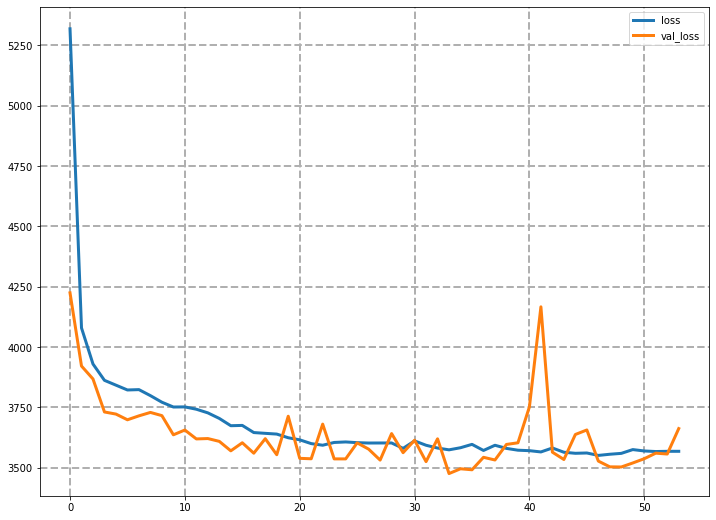

In [9]:
#plot loss
hist_frame[['loss', 'val_loss']].plot(figsize = (12,9), linewidth = 3)
plt.grid(linewidth = 2, linestyle = '--')


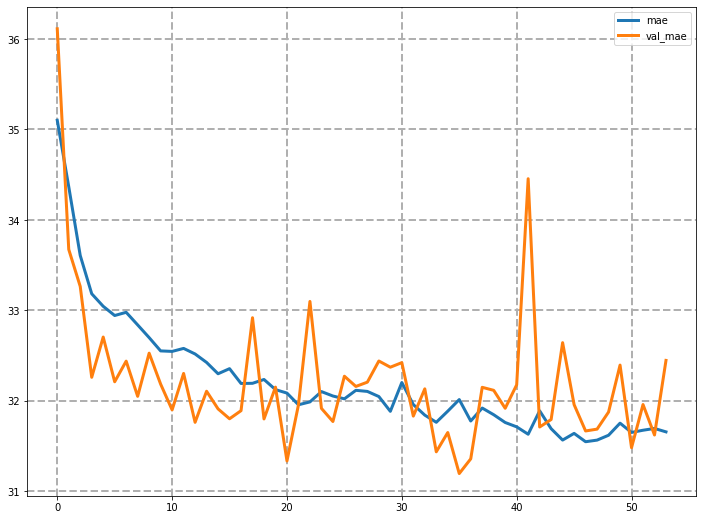

In [22]:
#plot metric
hist_frame[['mae', 'val_mae']].plot(figsize = (12,9), linewidth = 3)
plt.grid(linewidth = 2, linestyle = '--')


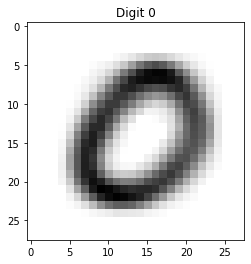

In [33]:
i = 0
plt.imshow(model.predict([i]).reshape(28,28), cmap = 'Greys')
plt.title('Digit {}'.format(i))
plt.show()

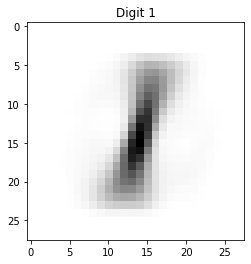

In [34]:
i = 1
plt.imshow(model.predict([i]).reshape(28,28), cmap = 'Greys')
plt.title('Digit {}'.format(i))
plt.show()

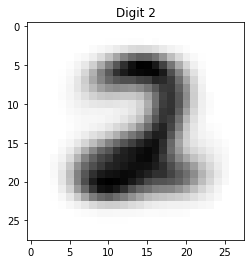

In [35]:
i = 2
plt.imshow(model.predict([i]).reshape(28,28), cmap = 'Greys')
plt.title('Digit {}'.format(i))
plt.show()

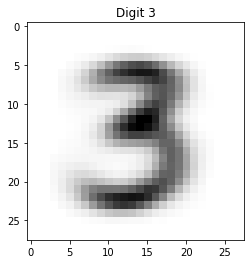

In [36]:
i = 3
plt.imshow(model.predict([i]).reshape(28,28), cmap = 'Greys')
plt.title('Digit {}'.format(i))
plt.show()

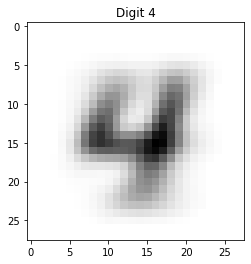

In [37]:
i = 4
plt.imshow(model.predict([i]).reshape(28,28), cmap = 'Greys')
plt.title('Digit {}'.format(i))
plt.show()

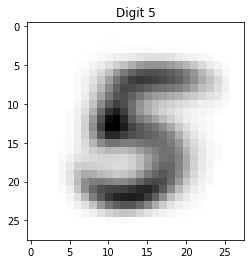

In [38]:
i = 5
plt.imshow(model.predict([i]).reshape(28,28), cmap = 'Greys')
plt.title('Digit {}'.format(i))
plt.show()

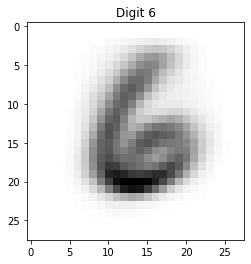

In [39]:
i = 6
plt.imshow(model.predict([i]).reshape(28,28), cmap = 'Greys')
plt.title('Digit {}'.format(i))
plt.show()

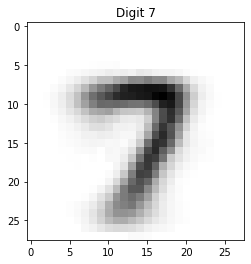

In [40]:
i = 7
plt.imshow(model.predict([i]).reshape(28,28), cmap = 'Greys')
plt.title('Digit {}'.format(i))
plt.show()

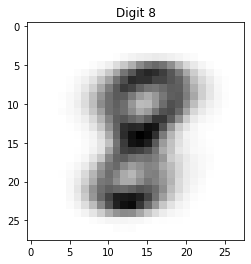

In [41]:
i = 8
plt.imshow(model.predict([i]).reshape(28,28), cmap = 'Greys')
plt.title('Digit {}'.format(i))
plt.show()

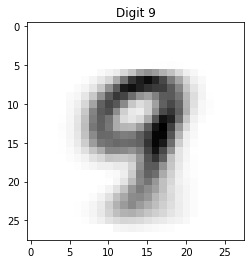

In [42]:
i = 9
plt.imshow(model.predict([i]).reshape(28,28), cmap = 'Greys')
plt.title('Digit {}'.format(i))
plt.show()

In [43]:
#save model
model.save('digits-mnist-generation-mse-loss-mae-metric.h5')
